### Author: `Winston Menzies`
> #### Imperial College Business School
> #### Professional Certificate in Machine Learning and Artifical Intelligence
#### Date: `29 April 2024`
#### Student ID: `484 (Class of 2023)`
#### Required activity 25.3: `Portfolio project on optimising a model for real-life data`
#### Usage: `Capstone Project - Predicting Ofsted School Grades`

## Activity directions

**1. Code Presentation:** Other people should be able to implement your code easily. Make sure it is well commented and clear. It is recommended that you use a Jupyter Notebook to present your method and results.

### Codebase Development
My preferred approach was to use a more modular, structured and reusable development, implementing an object-oriented programming (OOPs) codebase using classes, objects, inheritance etc, which would also lead to cleaner code and better maintainability. Therefore, I developed a library of Python files. Click on the link below to view the GitHub codebase.

> https://github.com/wrm65/Capstone-Project-2024/tree/main/src

While this notebook build and run the models developed to meet the requirements for this project, it does not contain any devlopment code. Instead it contains a series of function calls to run the models and produce the performance metrics, graphs and summmary reports.

Full explanations and expectations are provided prior to running each function. 

### <span style='background:green'><font color = white>&nbsp;Start School Rating Process&nbsp;</font></span>

In [1]:

# import libraries needed to run the models
import sys
sys.path.append("./src")
from constants import *
from school_ofsted_rating import SchoolRating

# create instance of school rating class

school_rating = SchoolRating()


::SchoolRating::initialisation::...
::SchoolRating::loading Ofsted Inspected School [OIS] dataset::...
::SchoolRating::initialisation::Elapse time: 0:00:00.030751


### Exploratory data analysis (EDA)

Let's gain a deeper understanding of the OIS dataset, so we can make informed decisions about how to proceed with our analysis.

1. **OIS dataset dimension**<br>
> total rows and columns
2. **Dataset definition**<br>
> column names and datatype
3. **View _head_ of dataset**<br>
> first 5 rows
4. **Check for missing values**<br>
> show column _NULL_ counts
5. **Classification**<br>
> list the classifications to _predict_

In [2]:

#call fuction to report on dataset vitals

school_rating.report_dataset_vitals()



 1. Dataset: 
  Filename:       ./dataset/school_ofsted_rating.csv
  Total Rows:     20,571
  Total Columns:  18

 2. Column definition: 
  1     unique_reference_number             int64
  2     authority_code                      int64
  3     establishment_type_code             int64
  4     pupil_number                        int64
  5     pupil_boys                          int64
  6     pupil_girls                         int64
  7     gender_type                         int64
  8     gender_category                     object
  9     religious_type                      int64
  10    religious_classification            object
  11    percent_pupil_boys                  int64
  12    percent_pupil_girls                 int64
  13    percent_ehc_plan                    int64
  14    percent_sen_support                 int64
  15    percent_english_language            int64
  16    percent_not_english_language        int64
  17    percent_free_school_meals           int64
  18    r

### - show additional data analysis

1. **School Gender Type**<br>
> percentage of _boys_, _girls_, and _mixed_ schools
2. **School Religious Ethos**<br>
> percentage of _Chruch of England_, _Roman Catholic_, _Other religion_ and _non-faith_ schools
2. **School Ofsted Rating**<br>
> percentage of _Outstanding_, _Good_, _Requires improvement_, and _Inadequate_ ratings


 1. School Gender Type: 

   List of unique values:  3  
    ['Mixed' 'Girls' 'Boys']

                   Total_Schools  Percentage
    1.  Boys                 283       1.38%  
    2.  Girls                274       1.33%  
    3.  Mixed             20,014      97.29%  

      Total: 20,571

 2. School Religious Ethos: 

   List of unique values:  4  
    ['Church of England' 'Not applicable' 'Roman Catholic' 'Other religion']

                               Total_Schools  Percentage
    1.  Church of England              4,207      20.45%  
    2.  Not applicable                14,301      69.52%  
    3.  Other religion                   464       2.26%  
    4.  Roman Catholic                 1,599       7.77%  

      Total: 20,571


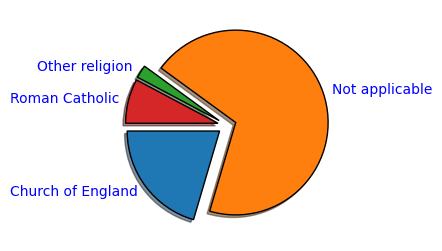


 3. School Ofsted Rating: 

   List of unique values:  4  
    ['Outstanding' 'Good' 'Requires improvement' 'Inadequate']

                                  Total_Schools  Percentage
    1.  Good                             16,035      77.95%  
    2.  Inadequate                           90       0.44%  
    3.  Outstanding                       2,835      13.78%  
    4.  Requires improvement              1,611       7.83%  

      Total: 20,571


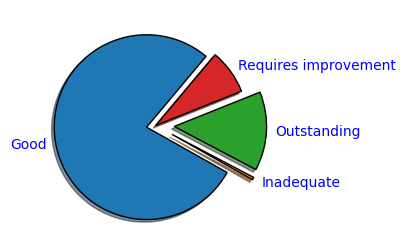

In [3]:

#call fuction to show summary report

school_rating.show_summary()


### Data Preprocessing

1. **Remove _irrelevant_ columns**
2. **Encode Categorical Variables**<br>
> convert ratings to numerical values<br>
> `Outstanding = 1`<br>
> `Good = 2`<br>
> `Requires improvement = 3`<br>
> `Inadequate = 4`<br>
3. **List the models being used**

In [4]:

# call function to drop unwanted columns
# columns being dropped will be shown
# resulting dataset definition will also be shown

school_rating.drop_unwanted_columns()


Dropping columns: 8
  ['unique_reference_number', 'authority_code', 'establishment_type_code', 'gender_category', 'religious_classification', 'pupil_number', 'pupil_boys', 'pupil_girls']


 1. Column definition: 
  1     gender_type                         int64
  2     religious_type                      int64
  3     percent_pupil_boys                  int64
  4     percent_pupil_girls                 int64
  5     percent_ehc_plan                    int64
  6     percent_sen_support                 int64
  7     percent_english_language            int64
  8     percent_not_english_language        int64
  9     percent_free_school_meals           int64
  10    rating                              object


In [5]:

# call function to encode categorical variables 

school_rating.encode_rating_catogory()



   List of unique values:  4  
    ['Outstanding' 'Good' 'Requires improvement' 'Inadequate']

0        Outstanding
1        Outstanding
2               Good
3               Good
4               Good
            ...     
20566           Good
20567    Outstanding
20568    Outstanding
20569           Good
20570           Good
Name: rating, Length: 20571, dtype: object

 Encoding values... 


   List of unique values:  4  
    [1 2 3 4]

0        1
1        1
2        2
3        2
4        2
        ..
20566    2
20567    1
20568    1
20569    2
20570    2
Name: rating, Length: 20571, dtype: int32


## <span style='background:black'><font color = white>&nbsp;Model Development and Tuning&nbsp;</font></span>

## Data Preparation

### Training, and Testing

Data splitting divides a dataset into two main subsets: 
- the training set, used to train the model;
- and the testing set, used for checking the model’s performance on new data.

In [6]:

# call function to split the dataset as specified
# traing set will be 65% of dataset
# testing set will be 35% of dataset

school_rating.split_data(0.35)



  Confirm Data Split: 

     Training set ( 65% ): {'X_train': (13371, 9), 'y_train': (13371,)}
      Testing set ( 35% ): {'X_test': (7200, 9), 'y_test': (7200,)}
   Dataset total ( 100% ): 13,371 + 7,200 = 20,571


## Build and Run Models
The building and running of a model is encapsulated in the function `build_model(model_type)` where the argument `model_type` specify the **_model_** to build and run.

The steps involve in the building and running process are:
- pre-build process: _define_ hyperparamter to tune
- train model: _fit_ model using training data
- predict model: _predict_ model using test data 
- evaluate model: _calculate_ set of performance metrics (`accuracy`, `mean squared error`, `recall` and `f1 scorce`)
- print metrics: _print_ performance metrics for comparison
- post build process: _provide_ additional information such as _importance of features_, _classification report_, _decision tree visualisation_

#### Evaluate Model
- **accuracy:**<br>
$$ \text{Accuracy} = \frac{\text{Number of Correct Predictions}}{\text{Total Number of Predictions}}$$
- **mean squared error:**<br>
$$ \text{MSE} = \frac{1}{n}\sum \limits _{i=1} ^{n} \left(y_i - \hat{y}_i\right)^2$$
- **recall score**<br>
$$ \text{Recall} = \frac{\text{True Positives}}{\text{True Positives}+\text{False Negatives}}$$
- **precision score:**<br>
$$ \text{Precision} = \frac{\text{True Positives}}{\text{True Positives}+\text{False Positives}}$$
- **f1 score:**<br>
$$ F1 = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}$$

#### Importance of features
- Feature importance gives us better **interpretability** of data.
- Features provide insights into the underlying relationships and processes within the data.
- Understanding which features are important can help in interpreting the results of the analysis and drawing meaningful conclusions.

#### Classification Report
- The classification report provides a detailed breakdown of how well the models performs on each class (`Outstanding` `Good` `Requires improvement` `Inadequate`), and how it balances the trade-off between precision and recall. It also provides the number of instances (support) for each class, which can indicate the class imbalance or the size of the dataset.

#### Decision Tree Visualisation
- A decision tree visualisation is used to illustrate how underlying data predicts a chosen target and highlights key insights about the decision tree.

In [7]:

# call function to list the models being used

school_rating.show_rating_models()


 Total models:  8  
1.  DecisionTreeClassifier(random_state=42)
2.  RandomForestClassifier(random_state=42)
3.  KNeighborsClassifier()
4.  SVC(random_state=42)
5.  LogisticRegression(random_state=42)
6.  GaussianNB()
7.  GradientBoostingClassifier(random_state=42)
8.  MLPClassifier(random_state=42)


## <font color = blue>Random Forest model</font>

The following steps are taken during the build and run process:

- **Hyperparamter tuning:** `n_estimators` - number of trees in the forest
- **Method:** iteratively tune the `n_estimators` parameter by increasing in steps of `50`and find the best performing `n_estimators` setting
- **Metrics:** `accuracy score` `recall score` `f1 score` `mean squared error`
- **Additional Info:** _Importance of Features_ and _Classification Report_

In [8]:

# call function to build and run the Random Forest model

# school_rating.build_model(MODEL_RANDOM_FOREST['TYPE'])


## <font color = blue>Gradient Boosting model</font>

The following steps are taken during the build and run process:

- **Hyperparamter tuning:** `n_estimators` - number of boosting stages to perform
- **Method:** iteratively tune the `n_estimators` parameter by increasing in steps of `10`and find the best performing `n_estimators` setting
- **Metrics:** `accuracy score` `recall score` `f1 score` `mean squared error`
- **Additional Info:** _Importance of Features_

In [9]:

# call function to build and run the Gradient Boosting model

# school_rating.build_model(MODEL_GRADIENT_BOOSTING['TYPE'])


## <font color = blue>Logistic Regression model</font>

The following steps are taken during the build and run process:

- **Hyperparamter tuning:** `max_iter` - maximum number of iterations taken for the solvers to converge
- **Method:** single step process
- **Metrics:** `accuracy score` `recall score` `f1 score` `mean squared error`
- **Additional Info:** _Importance of Features_

In [10]:

# call function to build and run the Logistic Regression model

# school_rating.build_model(MODEL_LOGISTIC_REGRESSION['TYPE'])


## <font color = blue>Naive Bayes model</font>

The following steps are taken during the build and run process:

- **Hyperparamter tuning:** `default settings`
- **Method:** single step process
- **Metrics:** `accuracy score` `recall score` `f1 score` `mean squared error`
- **Additional Info:** none provided

In [11]:

# call function to build and run the Naive Bayes model

# school_rating.build_model(MODEL_NAIVE_BAYES['TYPE'])


## <font color = blue>Support Vector model</font>

The following steps are taken during the build and run process:

- **Hyperparamter tuning:** `decision_function_shape` - one-vs-one (`ovo`) used as a multi-class strategy to train models
- **Method:** single step process
- **Metrics:** `accuracy score` `recall score` `f1 score` `mean squared error`
- **Additional Info:** none provided

In [12]:

# call function to build and run the Support Vector model

# school_rating.build_model(MODEL_SUPPORT_VECTOR['TYPE'])


## <font color = blue>K Nearest Neighbors (KNN) model</font>

The following steps are taken during the build and run process:

- **Hyperparamter tuning:** `n_neighbors` - number of neighbors to use by default for kneighbors queries
- **Method:** iteratively tune the `n_neighbors` parameter by increasing in steps of `10`and find the best performing `n_neighbors` setting
- **Metrics:** `accuracy score` `recall score` `f1 score` `mean squared error`
- **Additional Info:** none provided

In [13]:

# call function to build and run the KNN model

# school_rating.build_model(MODEL_KNN['TYPE'])


## <font color = blue>Multilayer Perceptron model</font>

The following steps are taken during the build and run process:

- **Hyperparamter tuning:** `hidden_layer_sizes` - _ith_ element represents the number of neurons in the _ith_ hidden layer
- **Method:** iteratively tune the `hidden_layer_sizes` parameter by increasing in steps of `2`and find the best performing `hidden_layer_sizes` setting
- **Metrics:** `accuracy score` `recall score` `f1 score` `mean squared error`
- **Additional Info:** _Classification Report_

In [14]:

# call function to build and run the Multilayer Perceptron model

# school_rating.build_model(MODEL_MULTILAYER_PERCEPTRON['TYPE'])


## <font color = blue>Decision Tree model</font>

The following steps are taken during the build and run process:

- **Hyperparamter tuning:** `max_depth` - maximum depth of the tree `max_leaf_nodes` - grow tree with maximum number of leaf nodes
- **Method:** iteratively tune the `max_leaf_nodes` parameter by increasing in steps of `5`and find the best performing `max_leaf_nodes` setting
- **Metrics:** `accuracy score` `recall score` `f1 score` `mean squared error`
- **Additional Info:** _Importance of Features_ and _Decision Tree Visulisation_

In [15]:

# call function to build and run the Decision Tree model

# school_rating.build_model(MODEL_DECISION_TREE['TYPE'])


## Model Evaluation

In [16]:

# call function to produce the list of important features for the models

# school_rating.show_important_features()


## <font color = blue>Confusion Matrix</font>

Confusion Matrix is a performance measurement for the model classification showing the different combinations of predicted and actual values. It is extremely useful for measuring `Recall` `Precision` `Specificity` and `Accuracy` scores.

- **True Positive (TP):** model predict `positive` and it's _true_
- **True Negative (TN):** model predict `negative` and it's _true_
- **False Positive (FP):** model predict `positive` and it's _false_
- **False Negative (FN):** model predict `negative` and it's _false_

In [17]:

# call function to produce the confusion matrix for the models

# school_rating.show_confusion_matrix()


In [18]:

# call function to produce the list of performance metrics for the models

# school_rating.evaluate_model()


### Results Analysis

## <span style='background:black'><font color = white>&nbsp;Data Imbalance&nbsp;</font></span>

The performance metrics report and confusion matrices show that there is a bias in the grading predictions.

To overcome the bias of the majority classes (Good and Outstanding) and balance the class distribution in the dataset, the **over-sampling** technique **SMOTE** will be used. Over-sampling involves creating synthetic instances for the minority classes (Inadequate and Requires Improvement) to match the number of instances in the majority classes.

#### - Address the problem of imbalanced datasets
> SMOTE - Synthetic Minority Oversampling Technique
> - SMOTE works by synthesizing new instances for the minority class by interpolating between existing minority class instances
> - For each minority class instance, SMOTE selects one or more of its nearest neighbors from the same class and creates synthetic instances along the line segments connecting the instance to its neighbours.
> - SMOTE helps to increase the representation of the minority class in the dataset without simply duplicating existing instances, thus reducing the risk of overfitting.

Original dataset shape:  (20571, 9) (20571,)

 1. School Ofsted Rating (before oversampling): 

   List of unique values:  4  
    ['Outstanding' 'Good' 'Requires Improvement' 'Inadequate']

                                  Total_Schools  Percentage
    1.  Good                             16,035      77.95%  
    2.  Inadequate                           90       0.44%  
    3.  Outstanding                       2,835      13.78%  
    4.  Requires Improvement              1,611       7.83%  

      Total: 20,571


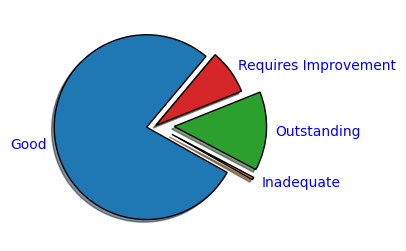


::Dataset::_do_run_data_balance::Elapse time: 0:00:00.019899
Resampled dataset shape:  (36516, 9) (36516,)

 2. School Ofsted Rating (after oversampling): 

   List of unique values:  4  
    ['Outstanding' 'Good' 'Requires Improvement' 'Inadequate']

                                  Total_Schools  Percentage
    1.  Good                             16,035      43.91%  
    2.  Inadequate                       16,035      43.91%  
    3.  Outstanding                       2,835       7.76%  
    4.  Requires Improvement              1,611       4.41%  

      Total: 36,516


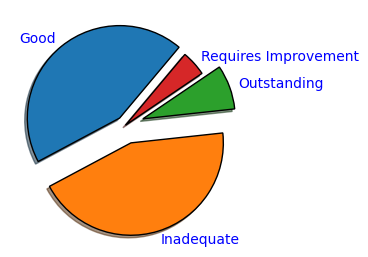

In [19]:

# call function to balance the data

school_rating.run_data_balance()


## Rebuild and rerun the models


 ::RandomForestModel::build_model:: starting...  RandomForestClassifier(n_estimators=50, random_state=42) 

    Iteration: 1 of 10 n_estimators: 50 accuracy score: 0.8532
    Iteration: 2 of 10 n_estimators: 100 accuracy score: 0.8538
    Iteration: 3 of 10 n_estimators: 150 accuracy score: 0.8546
    Iteration: 4 of 10 n_estimators: 200 accuracy score: 0.8553
    Iteration: 5 of 10 n_estimators: 250 accuracy score: 0.8556
    Iteration: 6 of 10 n_estimators: 300 accuracy score: 0.8556
    Iteration: 7 of 10 n_estimators: 350 accuracy score: 0.8560
    Iteration: 8 of 10 n_estimators: 400 accuracy score: 0.8557
    Iteration: 9 of 10 n_estimators: 450 accuracy score: 0.8556
    Iteration: 10 of 10 n_estimators: 500 accuracy score: 0.8556

  Best accuracy score: 0.8560
  Best estimators: 350

 Additional evaluation... 

  {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': Non

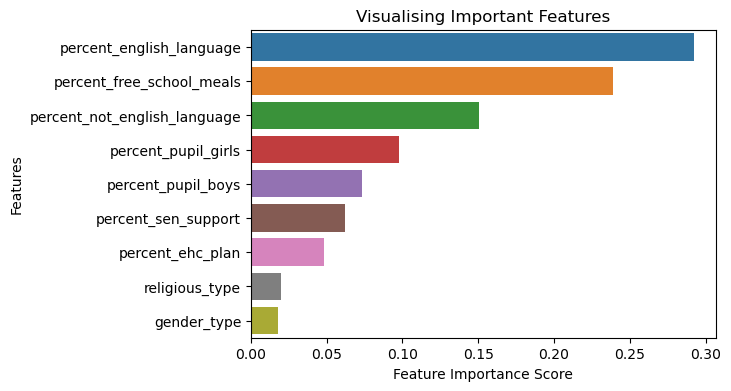


 Show classification report: 

                      precision    recall  f1-score   support

         Outstanding     0.4577    0.1169    0.1862      1018
                Good     0.7826    0.9428    0.8553      5560
Requires Improvement     0.1081    0.0067    0.0125       601
          Inadequate     0.9635    0.9952    0.9791      5602

            accuracy                         0.8560     12781
           macro avg     0.5780    0.5154    0.5083     12781
        weighted avg     0.8043    0.8560    0.8166     12781


 ::RandomForestModel::build_model:: completed  Elapse time: 0:01:34.551539 



In [20]:

# call function to build and run the Random Forest model

school_rating.build_model(MODEL_RANDOM_FOREST['TYPE'])



 ::GradientBoostingModel::build_model:: starting...  GradientBoostingClassifier(learning_rate=0.5, n_estimators=10, random_state=42) 

    Iteration: 1 of 10 n_estimators: 10 accuracy score: 0.8601
    Iteration: 2 of 10 n_estimators: 20 accuracy score: 0.8604
    Iteration: 3 of 10 n_estimators: 30 accuracy score: 0.8596
    Iteration: 4 of 10 n_estimators: 40 accuracy score: 0.8586
    Iteration: 5 of 10 n_estimators: 50 accuracy score: 0.8590
    Iteration: 6 of 10 n_estimators: 60 accuracy score: 0.8576
    Iteration: 7 of 10 n_estimators: 70 accuracy score: 0.8582
    Iteration: 8 of 10 n_estimators: 80 accuracy score: 0.8582
    Iteration: 9 of 10 n_estimators: 90 accuracy score: 0.8574
    Iteration: 10 of 10 n_estimators: 100 accuracy score: 0.8569

  Best accuracy score: 0.8604
  Best Number of boosting stages: 20

 Additional evaluation... 

  {'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.5, 'loss': 'log_loss', 'max_depth': 3, 'max_features

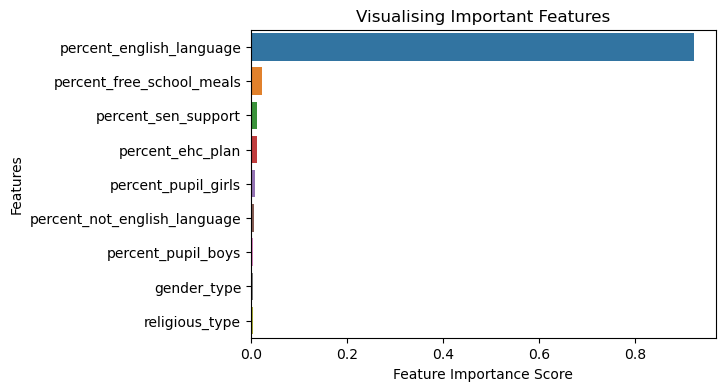


 ::GradientBoostingModel::build_model:: completed  Elapse time: 0:00:35.290596 



In [21]:

# call function to build and run the Gradient Boosting model

school_rating.build_model(MODEL_GRADIENT_BOOSTING['TYPE'])



 ::LogisticRegressionModel::build_model:: starting...  LogisticRegression(max_iter=500, random_state=42) 

Model Parameters:
  {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 500, 'multi_class': 'multinomial', 'n_jobs': None, 'penalty': 'l2', 'random_state': 42, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 LogisticRegression(max_iter=500, multi_class='multinomial',
                                    random_state=42))])

  Best accuracy score: 0.8557

 Additional evaluation... 

    Accuracy score: 0.8557233393318207
    Recall score: [0.03536346 0.95323741 0.99982149]
    F1 score: [0.06648199 0.85739707 0.97281806]
    Mean squared error: [0.21782333]

 Visualise importance of features: 

percent_english_language        2.133648
percent_pupil_girls             2.024274
percent_pupil_boys        

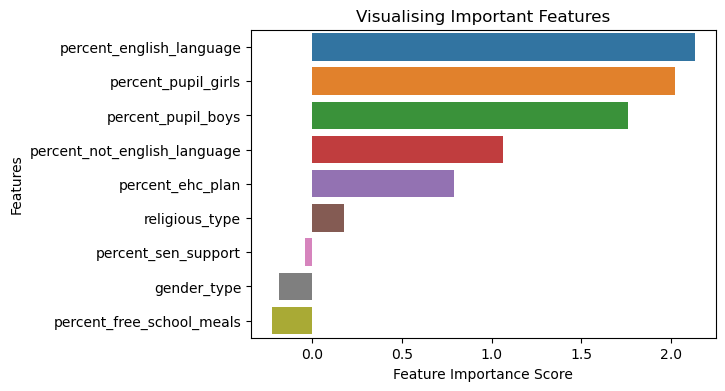


 ::LogisticRegressionModel::build_model:: completed  Elapse time: 0:00:00.458045 



In [22]:

# call function to build and run the Logistic Regression model

school_rating.build_model(MODEL_LOGISTIC_REGRESSION['TYPE'])


In [23]:

# call function to build and run the Naive Bayes model

school_rating.build_model(MODEL_NAIVE_BAYES['TYPE'])



 ::NaiveBayesModel::build_model:: starting...  GaussianNB() 

Model Parameters:
  {'priors': None, 'var_smoothing': 1e-09}

  1. Training model with X_train and y_train data...

  2. Predicting model with X_test data...

  3. Checking accuracy against y_test data...

    Model accuracy score: 0.8466


 Additional evaluation... 

    Accuracy score: 0.8465691260464753
    Recall score: [0.17485265 0.90503597 0.01331115 1.        ]
    F1 score: [0.23956931 0.8447205  0.025      0.97240062]
    Mean squared error: [0.23425397]

 ::NaiveBayesModel::build_model:: completed  Elapse time: 0:00:00.083858 



In [24]:

# call function to build and run the Support Vector model

school_rating.build_model(MODEL_SUPPORT_VECTOR['TYPE'])



 ::SupportVectorModel::build_model:: starting...  SVC(decision_function_shape='ovo', random_state=42) 

Model Parameters:
  {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovo', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': 42, 'shrinking': True, 'tol': 0.001, 'verbose': False}

  1. Training model with X_train and y_train data...

  2. Predicting model with X_test data...

  3. Checking accuracy against y_test data...

    Model accuracy score: 0.8576


 Additional evaluation... 

    Accuracy score: 0.8576011266724044
    Recall score: [0.021611   0.95989209 1.        ]
    F1 score: [0.04178538 0.85921275 0.9755333 ]
    Mean squared error: [0.20859088]

 ::SupportVectorModel::build_model:: completed  Elapse time: 0:00:44.101076 



In [25]:

# call function to build and run the KNN model

school_rating.build_model(MODEL_KNN['TYPE'])



 ::KNeighborsModel::build_model:: starting...  KNeighborsClassifier(n_neighbors=10) 

    Iteration: 1 of 10 n_neighbors: 10 accuracy score: 0.8543
    Iteration: 2 of 10 n_neighbors: 20 accuracy score: 0.8577
    Iteration: 3 of 10 n_neighbors: 30 accuracy score: 0.8571
    Iteration: 4 of 10 n_neighbors: 40 accuracy score: 0.8565
    Iteration: 5 of 10 n_neighbors: 50 accuracy score: 0.8562
    Iteration: 6 of 10 n_neighbors: 60 accuracy score: 0.8555
    Iteration: 7 of 10 n_neighbors: 70 accuracy score: 0.8545
    Iteration: 8 of 10 n_neighbors: 80 accuracy score: 0.8538
    Iteration: 9 of 10 n_neighbors: 90 accuracy score: 0.8526
    Iteration: 10 of 10 n_neighbors: 100 accuracy score: 0.8521

  Best accuracy score: 0.8577
  Best Number of neighbors: 20

 Additional evaluation... 

  {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 20, 'p': 2, 'weights': 'uniform'}


    Accuracy score: 0.8576793678115954
    Rec

In [26]:

# call function to build and run the Multilayer Perceptron model

school_rating.build_model(MODEL_MULTILAYER_PERCEPTRON['TYPE'])



 ::MultiLayerPerceptronModel::build_model:: starting...  MLPClassifier(early_stopping=True, hidden_layer_sizes=[12, 12, 12],
              max_iter=500, random_state=42) 

    Iteration: 1 of 10 hidden_layer_sizes: 12 accuracy score: 0.8553
    Iteration: 2 of 10 hidden_layer_sizes: 14 accuracy score: 0.8561
    Iteration: 3 of 10 hidden_layer_sizes: 16 accuracy score: 0.8569
    Iteration: 4 of 10 hidden_layer_sizes: 18 accuracy score: 0.8583
    Iteration: 5 of 10 hidden_layer_sizes: 20 accuracy score: 0.8602
    Iteration: 6 of 10 hidden_layer_sizes: 22 accuracy score: 0.8595
    Iteration: 7 of 10 hidden_layer_sizes: 24 accuracy score: 0.8587
    Iteration: 8 of 10 hidden_layer_sizes: 26 accuracy score: 0.8596
    Iteration: 9 of 10 hidden_layer_sizes: 28 accuracy score: 0.8595
    Iteration: 10 of 10 hidden_layer_sizes: 30 accuracy score: 0.8605

  Best accuracy score: 0.8605
  Best Hidden layer sizes: [30, 30, 30]

 Additional evaluation... 

  {'activation': 'relu', 'alpha': 0.


 ::DecisionTreeModel::build_model:: starting...  DecisionTreeClassifier(max_leaf_nodes=5, random_state=42) 

    Iteration: 1 of 10 max_leaf_nodes: 5 accuracy score: 0.8578
    Iteration: 2 of 10 max_leaf_nodes: 10 accuracy score: 0.8581
    Iteration: 3 of 10 max_leaf_nodes: 15 accuracy score: 0.8588
    Iteration: 4 of 10 max_leaf_nodes: 20 accuracy score: 0.8589
    Iteration: 5 of 10 max_leaf_nodes: 25 accuracy score: 0.8592
    Iteration: 6 of 10 max_leaf_nodes: 30 accuracy score: 0.8597
    Iteration: 7 of 10 max_leaf_nodes: 35 accuracy score: 0.8599
    Iteration: 8 of 10 max_leaf_nodes: 40 accuracy score: 0.8589
    Iteration: 9 of 10 max_leaf_nodes: 45 accuracy score: 0.8596
    Iteration: 10 of 10 max_leaf_nodes: 50 accuracy score: 0.8599

  Best accuracy score: 0.8599
  Best maximum leaf nodes: 35

 Additional evaluation... 

  {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 8, 'max_features': None, 'max_leaf_nodes': 35, 'min_impurity_decrease': 0

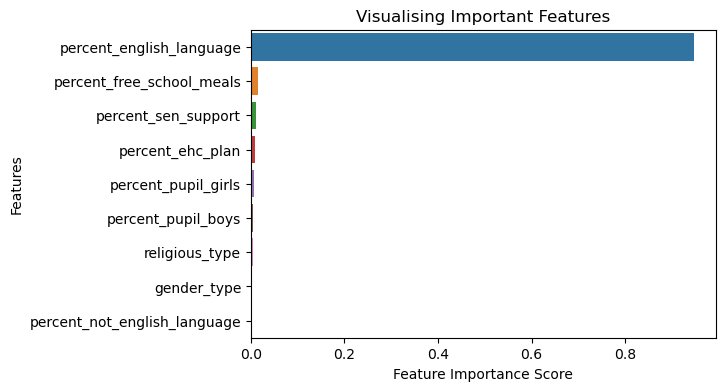


 Show Decision Tree: 



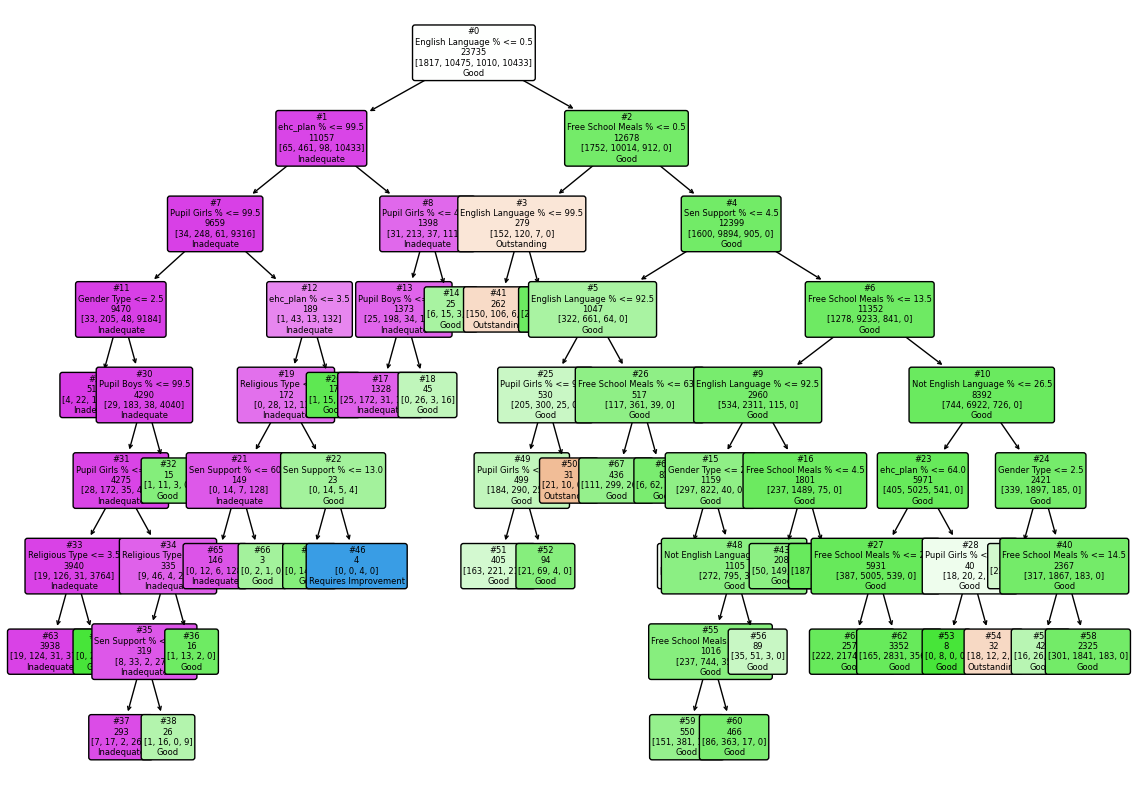


 Decision Tree Leaf Summary: 

1.  Outstanding              3
2.  Good                     26
3.  Requires Improvement     1
4.  Inadequate               5

  Total leaf nodes: 35


 ::DecisionTreeModel::build_model:: completed  Elapse time: 0:00:00.478680 



In [27]:

# call function to build and run the Decision Tree model

school_rating.build_model(MODEL_DECISION_TREE['TYPE'])


## Model Evaluation

In [28]:

# call function to produce the list of important features for the models

school_rating.show_important_features()



 List of Important Features 

                                 most_important                least_important             
    1.  Decision Tree            percent_english_language      percent_not_english_language  
    2.  Random Forest            percent_english_language      gender_type                   
    3.  Logistic Regression      percent_english_language      percent_free_school_meals     
    4.  Gradient Boosting        percent_english_language      religious_type                



 Model Confusion Matrices: 


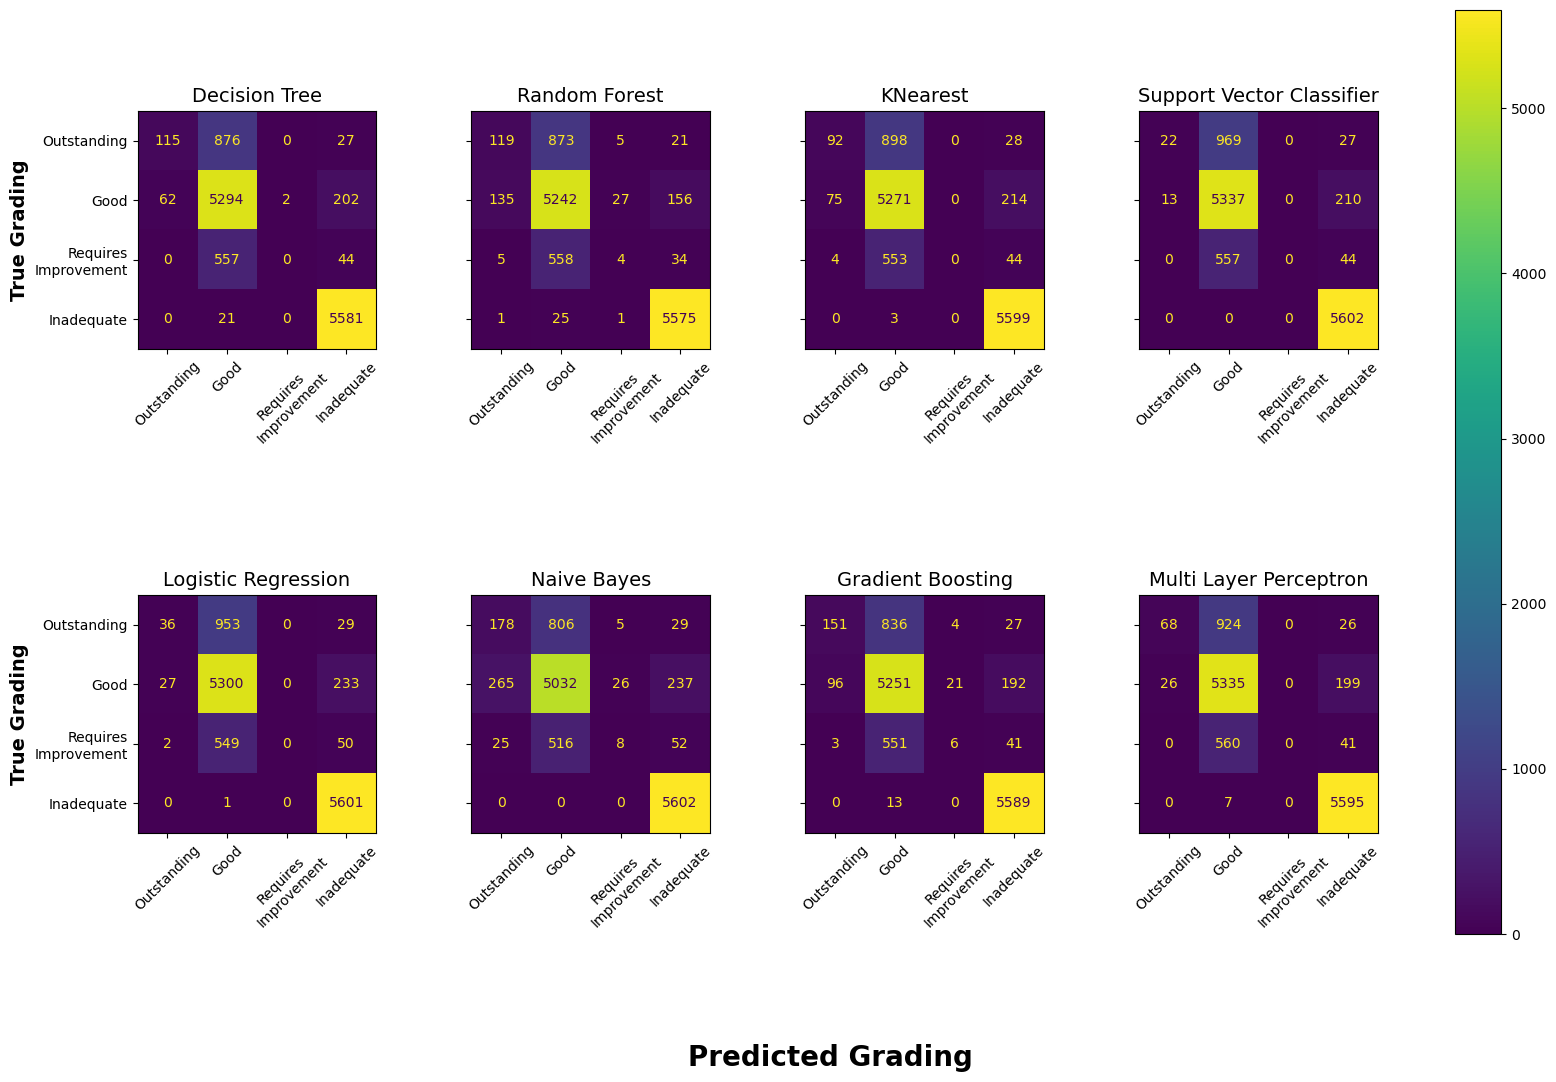

In [29]:

# call function to produce the confusion matrix for the models

school_rating.show_confusion_matrix()


In [30]:

# call function to produce a comparison table of the performance metrics of the models

school_rating.evaluate_model()



 Model Evaluation 
                                       iterations  elapse_time   hyperparameter
    1.  Decision Tree                  10          0:00:00.4786  {'max_depth': 8, 'max_leaf_nodes': 35}  
    2.  Gradient Boosting              10          0:00:35.2905  {'learning_rate': 0.5, 'n_estimators': 20}  
    3.  KNearest                       10          0:00:24.2007  {'n_neighbors': 20}  
    4.  Logistic Regression            1           0:00:00.4580  {'max_iter': 500, 'multi_class': 'multinomial'}  
    5.  Multi Layer Perceptron         10          0:01:27.0635  {'hidden_layer_sizes': [30, 30, 30], 'max_iter': 500, 'early_stopping': True}  
    6.  Naive Bayes                    1           0:00:00.0838  <default settings>  
    7.  Random Forest                  10          0:01:34.5515  {'n_estimators': 350}  
    8.  Support Vector Classifier      1           0:00:44.1010  {'decision_function_shape': 'ovo', 'kernel': 'rbf'}  

   Evaluation Metrics 
                   

In [31]:

# call function to produce the leaderboard for the models

school_rating.model_leaderboard()



 Model Leaderboard 

Model                       Accuracy    MSE    Recall    Recall    Recall    Recall    F1      F1     F1    F1     Overall    Overall
                                                O/s       Good       RI       I/a      O/s    Good    RI    I/a    Postion    Ranking
Decision Tree                  3         4       4         4         8         3        3      2      8      3       4.2        2*
Gradient Boosting              2         6       2         6         6         2        2      3      6      2       3.7         1
KNearest                       4         3       5         5         3         5        5      5      3      5       4.3         5
Logistic Regression            7         2       7         3         2         6        7      6      4      6        5         6*
Multi Layer Perceptron         1         7       6         2         4         7        6      1      1      7       4.2        2*
Naive Bayes                    8         1       1     

## Model Recommendation

- Based on the performance metrics, the **Multilayer Perceptron Classifier** model achieved the highest accuracy of `86.05%`, closely followed by the **Gradient Boosting Classifier** with `86.04%` for predicting Ofsted school grading.
- However, it's essential to consider other factors such as interpretability, computational complexity, and ethical considerations when selecting the best model.
- By considering insights from the four evaluation reports collectively, the model which is best suited for predicting Ofsted school grading is the **Decision Tree Classifier**, with an accuracy of `85.99%`.

- Using the **Decision Tree Classifier** model to predict Ofsted school grading offers several advantages that make it preferable in certain scenarios:
> - **Interpretability**: Decision trees are inherently interpretable models, meaning that the decision-making process is transparent and easy to understand. This is especially important in educational settings where stakeholders such as teachers, administrators, and policymakers need to comprehend the factors driving school grading decisions.
> - **Feature Importance**: Decision trees provide insight into the relative importance of different features in predicting school grading. By examining the decision rules and splits in the tree, stakeholders can identify which features have the greatest influence on the classification outcome. This information can inform targeted interventions and improvement strategies.
> - **Natural Representation of Decision-Making**: Decision trees mimic human decision-making processes, making them intuitive and easy to relate to for stakeholders. This natural representation can facilitate discussions and collaboration between educators, policymakers, and other stakeholders involved in education quality and improvement efforts.



### <span style='background:green'><font color = white>&nbsp;End School Rating Process&nbsp;</font></span>


## Thank You _!_

<img src="./images/email_logo-01_190x65.png" alt="Grammology" style="width: 110px;"/>